### Imports

In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns  
# import numpy as np
# import tpot as tp
# import imblearn
# from collections import Counter
# from tpot import TPOTClassifier
# from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids 
# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN 
# from imblearn.combine import SMOTETomek, SMOTEENN
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
from Functions import *
# sns.set()
from imports import *

### Load data into pandas dataframe

In [2]:
bc_data = pd.read_csv('breast-cancer-wisconsin.data',names=['id_number','Clump Thickness', 'Uniformity of Cell Size',
                 'Uniformity of Cell Shape', 'Marginal Adhesion', 
                 'Single Epithelial Cell Size','Bare Nuclei',
                 'Bland Chromatin','Normal Nucleoli','Mitosis','Class'])
bc_data.head()

,id_number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
bc2 = pd.read_csv('bc_data.csv', header = [1])

In [3]:
bc2.columns

Index(['id_number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitosis', 'Class', 'id_number.1', 'Diagnosis',
       'radius', 'mean_radius', 'texture', 'mean_texture', 'perimeter',
       'mean_perimeter', 'area', 'mean_area', 'smoothness', 'mean_smoothness',
       'compactness', 'mean_compactness', 'concavity', 'mean_concavity',
       'concave_points', 'mean_concave_points', 'symmetry', 'mean_symmetry',
       'fractal_dimension', 'mean_fractal_dimension'],
      dtype='object')

### visualize the target class numbers to check for balance of classifier column

Benign: 458
Malignant: 241
Proportion: 1.9 : 1


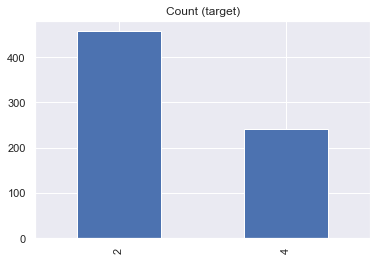

In [4]:
# target_count = bc2.Class.value_counts()
# print('Benign:', target_count[2])
# print('Malignant:', target_count[4])
# print('Proportion:', round(target_count[2] / target_count[4], 2), ': 1')

# target_count.plot(kind='bar', title='Count (target)');
get_target_counts(bc2)

Check data types in the dataframe

In [69]:
bc2.dtypes

id_number                        int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitosis                          int64
Class                            int64
id_number.1                    float64
Diagnosis                       object
radius                         float64
mean_radius                    float64
texture                        float64
mean_texture                   float64
perimeter                      float64
mean_perimeter                 float64
area                           float64
mean_area                      float64
smoothness                     float64
mean_smoothness                float64
compactness                    float64
mean_compactness               float64
concavity                

create a target array and remove it from the data table

get dummies for bare nuclei

In [5]:
target = bc2['Class']
bc2.drop('Class', axis = 1, inplace = True)

In [6]:
bc_data_full = prepare_data(bc2)

In [70]:

# bc_data_with_dummies = pd.get_dummies(bc2)

In [71]:
# bc_data_with_dummies.columns

Index(['id_number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitosis', 'Class', 'id_number.1', 'radius', 'mean_radius', 'texture',
       'mean_texture', 'perimeter', 'mean_perimeter', 'area', 'mean_area',
       'smoothness', 'mean_smoothness', 'compactness', 'mean_compactness',
       'concavity', 'mean_concavity', 'concave_points', 'mean_concave_points',
       'symmetry', 'mean_symmetry', 'fractal_dimension',
       'mean_fractal_dimension', 'Bare Nuclei_1', 'Bare Nuclei_10',
       'Bare Nuclei_2', 'Bare Nuclei_3', 'Bare Nuclei_4', 'Bare Nuclei_5',
       'Bare Nuclei_6', 'Bare Nuclei_7', 'Bare Nuclei_8', 'Bare Nuclei_9',
       'Bare Nuclei_?', 'Diagnosis_B', 'Diagnosis_M'],
      dtype='object')

In [7]:
bc_data_full.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitosis,radius,mean_radius,...,Bare Nuclei_10,Bare Nuclei_2,Bare Nuclei_3,Bare Nuclei_4,Bare Nuclei_5,Bare Nuclei_6,Bare Nuclei_7,Bare Nuclei_8,Bare Nuclei_9,Bare Nuclei_?
id_number,,,,,,,,,,,,,,,,,,,,,
776715,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.952381,0.904762,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888820,5.0,10.0,10.0,3.0,7.0,8.0,10.0,2.0,1.904762,1.809524,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897471,4.0,8.0,6.0,4.0,3.0,10.0,6.0,1.0,0.952381,0.904762,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
897471,4.0,8.0,8.0,5.0,4.0,10.0,4.0,1.0,0.952381,0.904762,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


set index to id number

In [73]:
bc_data_with_dummies.set_index('id_number', inplace = True)

In [74]:
bc_data_with_dummies.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitosis,id_number.1,radius,...,Bare Nuclei_3,Bare Nuclei_4,Bare Nuclei_5,Bare Nuclei_6,Bare Nuclei_7,Bare Nuclei_8,Bare Nuclei_9,Bare Nuclei_?,Diagnosis_B,Diagnosis_M
id_number,,,,,,,,,,,,,,,,,,,,,
1000025,5,1,1,1,2,3,1,1,842302.0,17.99,...,0,0,0,0,0,0,0,0,0,1
1002945,5,4,4,5,7,3,2,1,842517.0,20.57,...,0,0,0,0,0,0,0,0,0,1
1015425,3,1,1,1,2,3,1,1,84300903.0,19.69,...,0,0,0,0,0,0,0,0,0,1
1016277,6,8,8,1,3,3,7,1,84348301.0,11.42,...,0,1,0,0,0,0,0,0,0,1
1017023,4,1,1,3,2,3,1,1,84358402.0,20.29,...,0,0,0,0,0,0,0,0,0,1


In [76]:
bc_data_with_dummies.drop(['id_number.1','Diagnosis_B','Diagnosis_M'], axis = 1, inplace = True)



In [77]:
bc_data_full = bc_data_with_dummies.interpolate(method = 'linear',axis = 1)

### Split data into training and testing sets

In [8]:
features = bc_data_full
X = bc_data_full
y = target
features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.25, random_state=1)

### testing data with xgboost to see what the accuracy score is without balancing the data first

In [26]:

model = XGBClassifier()
model.fit(features_train, target_train)
target_pred = model.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.57%


confusion matrix

Confusion matrix:
 [[135   2]
 [  1  72]]


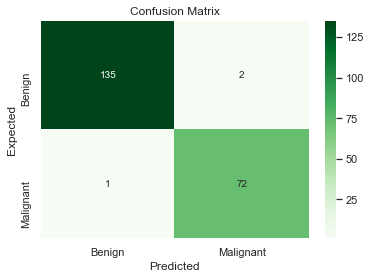

In [27]:
conf_mat = confusion_matrix(y_true=target_test, y_pred=target_pred)
print('Confusion matrix:\n', conf_mat)

ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt = 'g', cmap = 'Greens'); 

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Expected'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

Function to plot PCA and resampling results

In [79]:
# def plot_2d_space(X, y, label='Classes'):   
#     colors = ['#1F77B4', '#FF7F0E']
#     markers = ['o', 's']
#     for l, c, m in zip(np.unique(y), colors, markers):
#         plt.scatter(
#             X[y==l, 0],
#             X[y==l, 1],
#             c=c, label=l, marker=m
#         )
#     plt.title(label)
#     plt.legend(loc='upper right')
#     plt.show()

PCA to visualize the classes

In [9]:
pca = PCA(n_components=39)
pca_result = pca.fit_transform(bc_data_full)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plot_2d_space(pca_result, y, 'Imbalanced dataset (39 PCA components)')

Explained variation per principal component: [9.94172169e-01 4.33742317e-03 1.06319810e-03 2.36003561e-04
 7.47382547e-05 2.50919767e-05 2.01819098e-05 1.63139946e-05
 1.58378056e-05 1.12718289e-05 1.00044700e-05 6.39429145e-06
 4.76270263e-06 2.30327773e-06 9.72344510e-07 8.79411596e-07
 6.07837278e-07 5.15930638e-07 2.40352453e-07 2.33659833e-07
 1.93439420e-07 1.78664537e-07 1.53868829e-07 1.32687987e-07
 7.55758030e-08 6.75171129e-08 3.48235980e-08 1.14513291e-08
 4.19242301e-09 1.87093217e-09 1.01589422e-09 4.40302107e-10
 2.41999912e-10 1.77526834e-10 1.23156405e-10 8.55181100e-11
 3.03392284e-11 1.74635189e-11 5.81368762e-33]


NameError: name 'plt' is not defined

### Testing different resampling methods

Testing SMOTE oversampling method which generates new samples in the smaller sample from its nearest neighbors

[(2, 340), (4, 340)]


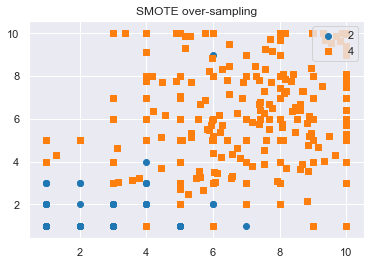

In [122]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(features_train, target_train)
print(sorted(Counter(y_sm).items()))

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

Testing SMOTE and Tomek combination over and undersampling method

[(2, 332), (4, 332)]


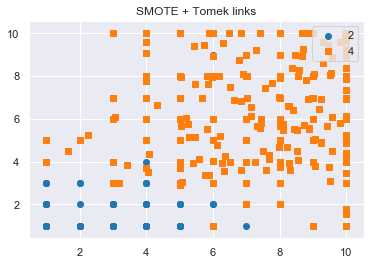

In [58]:
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(features_train, target_train)
print(sorted(Counter(y_smt).items()))

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

Testing SMOTE + NN combination over and under sampling method

[(2, 316), (4, 306)]


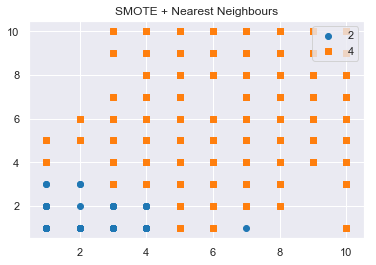

In [13]:
smote_enn = SMOTEENN(random_state=0)
X_smenn, y_smenn = smote_enn.fit_resample(features_train, target_train)
print(sorted(Counter(y_smenn).items()))

plot_2d_space(X_smenn, y_smenn, 'SMOTE + Nearest Neighbours')

 Testing ADASYN Over-sampling

[(2, 340), (4, 327)]


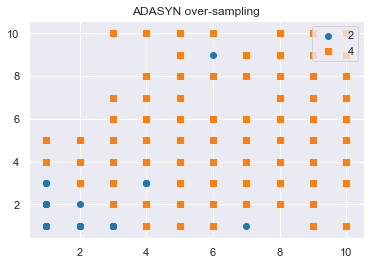

In [14]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN()
X_ada, y_ada = ada.fit_sample(features_train,target_train)
print(sorted(Counter(y_ada).items()))

plot_2d_space(X_ada,y_ada, 'ADASYN over-sampling')

## Undersampling methods

random under sampling

[(2, 184), (4, 184)]


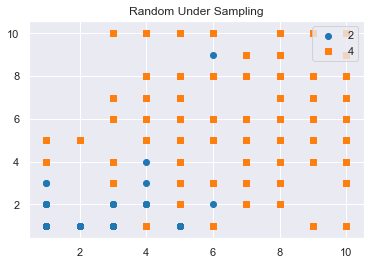

In [83]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(features_train, target_train)
print(sorted(Counter(y_rus).items()))

plot_2d_space(X_rus,y_rus, 'Random Under Sampling')

tomeklinks undersampling

[(2, 328), (4, 184)]


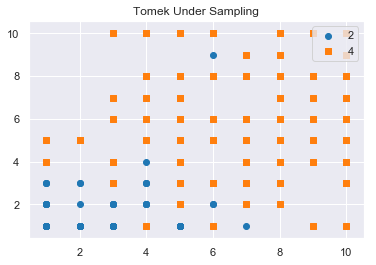

In [93]:
tml = TomekLinks(sampling_strategy= 'auto')
X_tml, y_tml = tml.fit_sample(features_train,target_train)
print(sorted(Counter(y_tml).items()))

plot_2d_space(X_tml,y_tml, 'Tomek Under Sampling')

centroid under sampling

In [86]:
cc = ClusterCentroids()
X_cc, y_cc = cc.fit(features_train,target_train)
print(sorted(Counter(y_cc).items()))

plot_2d_space(X_cc,y_cc, 'Centroid')

TypeError: cannot unpack non-iterable ClusterCentroids object

### TPOT

In [34]:
tpot = TPOTClassifier(generations=50, population_size= 50, cv = 10, verbosity= 2, n_jobs= 1)
tpot.fit(X_sm,y_sm)

Generation 1 - Current best internal CV score: 0.9779411764705882
Generation 2 - Current best internal CV score: 0.9779411764705882
Generation 3 - Current best internal CV score: 0.9779411764705882
Generation 4 - Current best internal CV score: 0.9779411764705882
Generation 5 - Current best internal CV score: 0.9779411764705882
Generation 6 - Current best internal CV score: 0.9779411764705882
Generation 7 - Current best internal CV score: 0.9779411764705882
Generation 8 - Current best internal CV score: 0.9779411764705882
Generation 9 - Current best internal CV score: 0.9794117647058824
Generation 10 - Current best internal CV score: 0.9794117647058824
Generation 11 - Current best internal CV score: 0.9794117647058824
Generation 12 - Current best internal CV score: 0.9808823529411764
Generation 13 - Current best internal CV score: 0.9808823529411764
Generation 14 - Current best internal CV score: 0.9808823529411764
Generation 15 - Current best internal CV score: 0.9808823529411764
Gene

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=10,
               disable_update_check=False, early_stop=None, generations=50,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [36]:
print(tpot.score(features_test,target_test))

0.9714285714285714


In [37]:
tpot.export('tpot_bc_pipeline_ada.py')

### using the chosen model from tpot

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

In [123]:
extratrees = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
extratrees.fit(X_sm,y_sm)

extratrees_pred = extratrees.predict(features_test)

accuracy = accuracy_score(target_test, extratrees_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 96.57%


In [119]:
#extratrees with undersampling
extratreesus = ExtraTreesClassifier(bootstrap=True, criterion='gini', max_features=0.7000000000000001, 
                                    min_samples_leaf=1, min_samples_split=8, n_estimators=100)
extratreesus.fit(X_rus, y_rus)

extratreesus_pred = extratreesus.predict(features_test)

accuracy = accuracy_score(target_test, extratreesus_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.71%


In [117]:
def plot_confusion_matrix(y_test,model_pred):
    conf_mat = confusion_matrix(y_true=y_test, y_pred=model_pred)
    #print('Confusion matrix:\n', conf_mat)

    ax= plt.subplot()
    sns.heatmap(conf_mat, annot=True, ax = ax, fmt = 'g', cmap = 'Greens'); 

    # labels, title and ticks
    ax.set_xlabel('Predicted');ax.set_ylabel('Expected'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);
    print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       118
           4       0.95      0.98      0.97        57

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.97       175
weighted avg       0.98      0.98      0.98       175



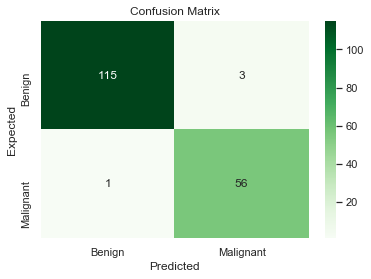

In [120]:
plot_confusion_matrix(target_test,extratreesus_pred)

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       118
           4       0.95      0.95      0.95        57

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175



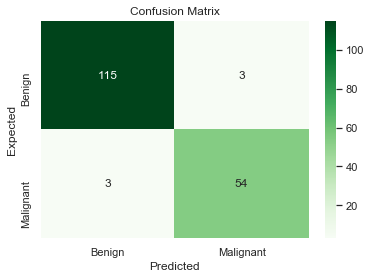

In [124]:
plot_confusion_matrix(target_test, extratrees_pred)

In [125]:
def plot_feature_importances(model):
    n_features = features_train.shape[1]
    plt.figure(figsize=(8,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), features_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

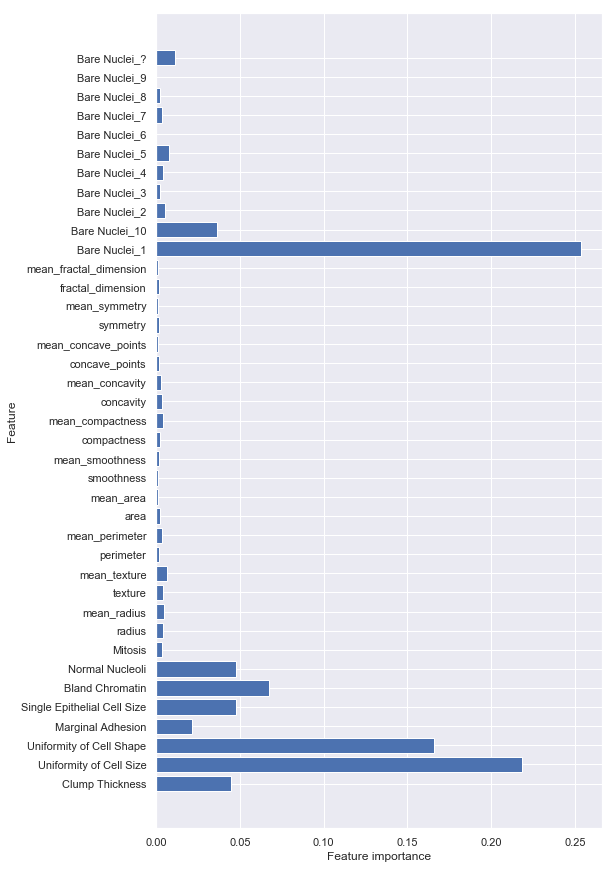

In [90]:
plot_feature_importances(extratrees)

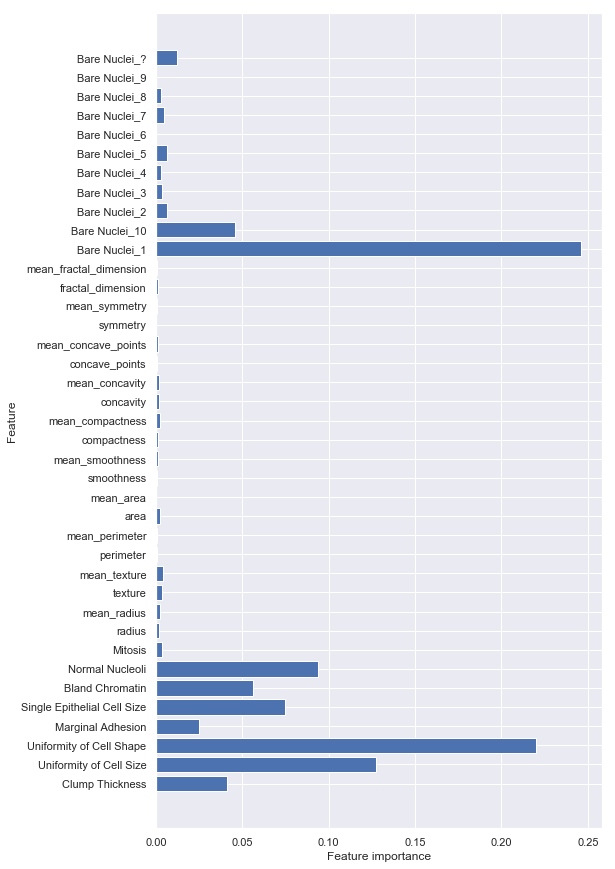

In [126]:
plot_feature_importances(extratreesus)

### visualizing one of the trees 

In [96]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# import os     
# os.environ["PATH"] += os.pathsep + 'Macintosh HD⁩/⁨Users⁩/harrisonmiller⁩/anaconda3⁩/⁨envs⁩/learn-env⁩/lib⁩/⁨python3.6⁩/site-packages⁩'
# dot_data = StringIO()
# export_graphviz(extratrees.estimators_[0], out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

### ROC, PRECISION-RECALL GRAPHS

In [127]:
def plot_ROC_curve(x_test,y_test,model):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    probs = model.predict_proba(x_test)
    probs = probs[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,probs, pos_label= 4)
    auc = roc_auc_score(y_test, probs)
    plt.figure(figsize=(12,8))
    plt.title("ROC",fontsize = 14)
    plt.xlabel("FPR", fontsize = 12)
    plt.ylabel("TPR", fontsize = 12)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr, tpr, marker = '.', linewidth = 4)
    plt.legend(["AUC=%.3f"%auc],loc = 'lower right',prop={'size': 30})
    plt.show()

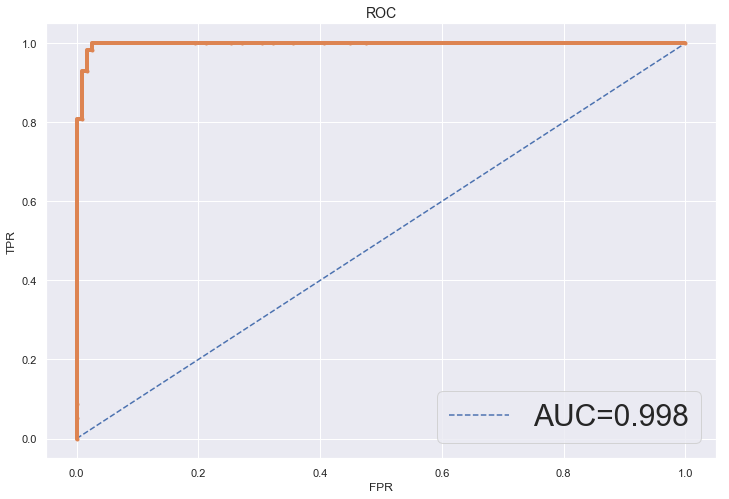

In [128]:
plot_ROC_curve(features_test,target_test,extratreesus)

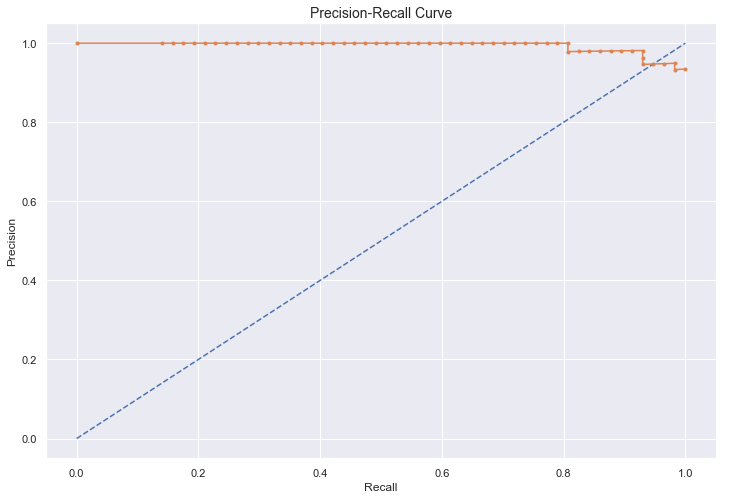

In [114]:
#calculate Precision-Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
probs = extratrees.predict_proba(features_test)
probs = probs[:,1]
yhat = extratrees.predict(X_rus)
precision, recall, thresholds = precision_recall_curve(target_test,probs, pos_label= 4)
plt.figure(figsize=(12,8))
plt.title("Precision-Recall Curve",fontsize = 14)
plt.xlabel("Recall", fontsize = 12)
plt.ylabel("Precision", fontsize = 12)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(recall,precision, marker ='.')
plt.show()

In [1]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools
from sklearn import model_selection